# Casino Simulations Visualization

By Hunter Sikora

In [531]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from altair import Bin
from IPython.display import Image

## Roulette

Roulette is a common Casino game played by spinning a wheel with 38 (0-36 and one 00) possible numbers on the spokes. Players may place bets on individual numbers or specific groups of numbers. A metal ball spins the opposite way within the wheel and eventually comes to rest on one of the numbers. If a player bet on the number itself or a group containing this number the player wins their money along with the original bet. There are seveal ways to bet in Roulette and each bet has different payouts, and while it can be very eash to calculate the expected loss in Roulette, it is very difficult to form an intutition about how much money one loses or gains over n number of games. To help build this intuition players need visualizations that can show what happens at different bet sizes and number of games played.

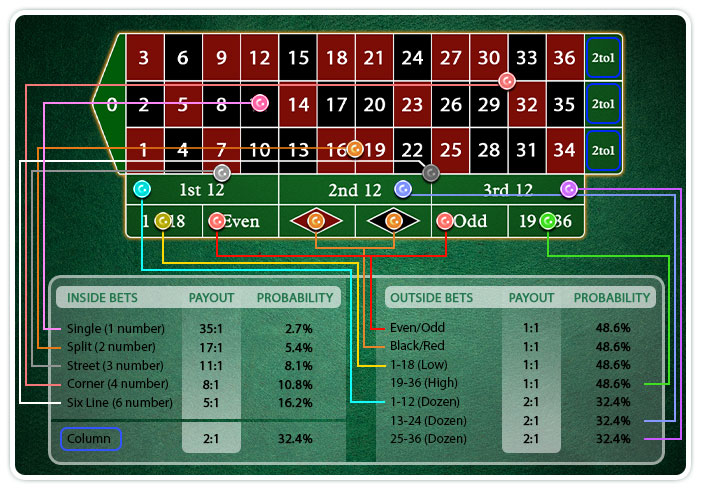

In [533]:
Image(filename = 'Roulette.jpg')

Wyman, Angela. “Roulette Odds &amp; Payouts - Improve Your Odds.” Casino.com Blog, 30 May 2022, https://www.casino.com/blog/guides/roulette/odds-and-payouts/. 

#### Red and Black Bet

The first step to creating and intutive idea of what is happening when betting is to start with the simplest bet, the bet on the color Red or Black. The following simulations provide a look at thousands of simulations of roulette at the bet size of 10 and each player playing a different number of times.

In [536]:
#color payout takes in the color bet on, the spin number, and the bet a parameters. It returns the total payout from the spin.
def color_payout(color, number, bet):
    
    red_numbers = [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]
    black_numbers = [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]
    
    if color == 1 and number in red_numbers:
        return bet*2
    elif color == 0 and number in black_numbers:
        return bet*2
    else:
        return 0
    
#spin generates a random number between 0 and 37. 37 is being used in place of double zero.
def spin():
    return random.randrange(0,38)

#gamble represents on player gambling n number of times on a certian bet. It gives the total gains and losses from the event
def gamble_roulette(number_of_games, bet):
    payout = 0
    cost = 0
    for x in range(number_of_games):
        payout += color_payout(1,spin(),bet)
        cost += bet
    
    return payout - cost
    

Test of the gamble function by having a bet size of ten and the number of games be 10. This represents a player playing 10 rounds of Roulette. The resulting payout is the total net result.

In [537]:
for x in range(10):
    print(gamble_roulette(10,10))

-20
40
-20
-20
0
20
-20
-20
40
-80


The simulate function will allow us to run as many instances of gamble as we would like and export the results to a DataFrame. Each entry in the DataFrame is the result of one gambler playing n rounds of Roulette.

In [538]:
#the simulate function simulates n number of gambles this represents n number of gamblings playing x number of games
def simulate_roulette(number_of_games, number_of_simulations, bet):
    outcomes = []
    for x in range(number_of_simulations):
        outcomes.append(gamble_roulette(number_of_games, bet))
        
    return pd.DataFrame(outcomes, columns = ['Gain/Loss'])

In [593]:
simulation = simulate_roulette(10,5000,10)
print(simulation.mean())
print(simulation.median())

simulation

Gain/Loss   -4.664
dtype: float64
Gain/Loss    0.0
dtype: float64


,Gain/Loss
0,40
1,-20
2,-40
3,20
4,-80
...,...
4995,20
4996,20
4997,0
4998,-60


The mean is very close to the expected value we would expect from 100 dollars betting on Roulette. Expected loss = (10(18/38) + (-10)(20/38))* = 5.263 So the simulation is working. Next step is to plot.

(array([   6.,   75.,  273.,  693., 1110., 1249.,  917.,  502.,  143.,
          32.]),
 array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
          80.,  100.]),
 <BarContainer object of 10 artists>)

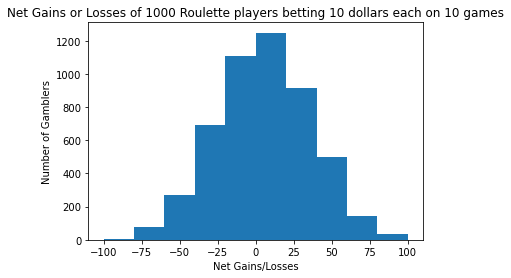

In [594]:
plt.title("Net Gains or Losses of 1000 Roulette players betting 10 dollars each on 10 games")
plt.xlabel("Net Gains/Losses")
plt.ylabel("Number of Gamblers")
plt.hist(simulation)

Not a great plot. It looks like there are more winners than losers. This is due to the bar 0-25 containing zero, the most common value. So this must be changed.

In [541]:
alt.Chart(simulation).mark_bar().encode(
    alt.X("Gain/Loss:Q",bin=Bin(step=20, anchor=-10), title = 'Total Gains/Losses', scale = alt.Scale(domain=(-110, 110))),
    alt.Y('count()', title = 'Total Players'),
).properties(title='Net Gains or Losses of 5000 Roulette players betting 10 dollars each on 10 games')

alt.Chart(...)

This a much better representation. But still looks pretty much like a normal distrubtion centered around 0. Does a boxplot help?

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffc8da2970>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffc8daf0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffc8da25e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffc8daf7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffc8dafb80>],
 'means': []}

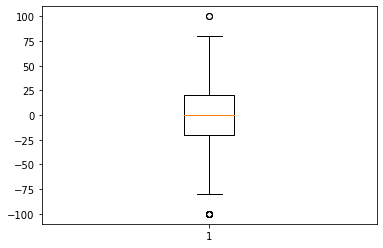

In [542]:
plt.boxplot(simulation)

Doesn't seem to convery the risk of gambling very well. It continues to look more or less like a normal distribution centered around 0. So either gambling with Roulette isn't so bad, or we are overlooking something. Let's try increasing the number of times somone gambles.

In [543]:
simulation = simulate_roulette(100,5000,10)

In [544]:
alt.Chart(simulation).mark_bar().encode(
    alt.X("Gain/Loss:Q",bin=Bin(step=40, anchor=0), title = 'Total Gains/Losses', scale = alt.Scale(domain=(-400, 400))),
    alt.Y('count()', title = 'Total Players'),
).properties(title='Net Gains or Losses of 5000 Roulette players betting 10 dollars each on 100 games')

alt.Chart(...)

Better, now let's try upping the total number of times someone gambles to a thousand to see lifetime losses/gains.

In [545]:
simulation = simulate_roulette(1000,1000,10)

In [546]:
alt.Chart(simulation).mark_bar().encode(
    alt.X("Gain/Loss:Q",bin=Bin(step=200), title = 'Total Gains/Losses'),
    alt.Y('count()', title = 'Total Players'),
).properties(title='Net Gains or Losses of 5000 Roulette players betting 10 dollars each on 1000 games')

alt.Chart(...)

Now we have something worth visualizing via histogram. One can now easily see the risk of gambling over the long term, and what they can expect to lose over the long term. But let's continue and creates some visualizations to seperate the winners in the losers.

In [547]:
simulation['Winners']= simulation['Gain/Loss'][simulation['Gain/Loss'] > 0]

In [548]:
simulation["Even"] = simulation['Gain/Loss'][simulation['Gain/Loss'] == 0]

In [549]:
simulation['Losers']= simulation['Gain/Loss'][simulation['Gain/Loss'] < 0]

In [550]:
simulation

,Gain/Loss,Winners,Even,Losers
0,-320,NaN,NaN,-320.0
1,-900,NaN,NaN,-900.0
2,-460,NaN,NaN,-460.0
3,-640,NaN,NaN,-640.0
4,-700,NaN,NaN,-700.0
...,...,...,...,...
995,-580,NaN,NaN,-580.0
996,-620,NaN,NaN,-620.0
997,-740,NaN,NaN,-740.0
998,220,220.0,NaN,NaN


In [551]:
outcomes = pd.DataFrame({"total_players":[simulation.shape[0] - simulation['Winners'].isna().sum(),simulation.shape[0] - simulation['Even'].isna().sum(),simulation.shape[0] - simulation["Losers"].isna().sum()]}, index = ["winners", "even", "losers"])
outcomes

,total_players
winners,48
even,4
losers,948


In [552]:
outcomes['total_players']

winners     48
even         4
losers     948
Name: total_players, dtype: int64

C:\Users\hunte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='total_players'>

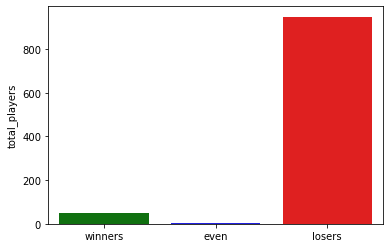

In [553]:
sns.barplot(outcomes.index, outcomes['total_players'], palette = ['Green', 'Blue', 'Red'])

Now that's an interesting bar chart. It really does show that the odds of winning at the casino over the long term are basically zero. Now lets combine the two concepts, a histogram type chart with the winners and losers seperated.

In [107]:
simulation_drop_all = simulation.drop(columns = ["Gain/Loss"])

Now we'll plot the distributions of the winners, losers, and those who broke even seperatly. 

[Text(0.5, 1.0, 'Profits Red/Black Bet, 1000 Spins of Roulette')]

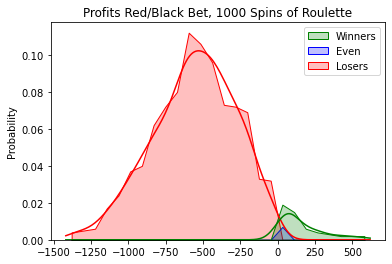

In [560]:
sns.histplot(simulation_drop_all,element = 'poly', stat = 'probability', multiple = "layer", kde = True, palette = ['Green', 'Blue', 'Red']).set(title = 'Profits Red/Black Bet, 1000 Spins of Roulette')

Now that really makes Roulette look bad over the long term, but let see the relationship of number of times betting to total losses. 

In [554]:
all_simulations = 0

for x in range(1,101):
    if x == 1:
        all_simulations = simulate_roulette(10,5,10)
        all_simulations["Number of Games"] = 10
    else:
        new_simulation = simulate_roulette(x*10,5,10)
        new_simulation["Number of Games"] = x*10
        all_simulations = all_simulations.append(new_simulation)

In [555]:
all_simulations

,Gain/Loss,Number of Games
0,0,10
1,-20,10
2,-40,10
3,0,10
4,20,10
...,...,...
0,-520,1000
1,-700,1000
2,-440,1000
3,-260,1000


[Text(0.5, 1.0, 'Gain/Loss vs Total Games Played')]

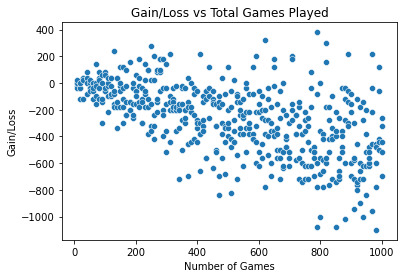

In [556]:
sns.scatterplot(x=all_simulations["Number of Games"], y = all_simulations["Gain/Loss"]).set(title='Gain/Loss vs Total Games Played')

It very intersting that even at a 1000 spins, some players are still in the positive. They are of course balanced out by some players losing over a thousand dollars. If you were up 200 dollars after a thousand spins, you might start considering yourself lucky or having a good stratagy. But it's important to know that there are those who still end up positive after many rounds. Let's focus this in and see exactly how many winners and losers there are after so many simulations.

In [88]:
simulation = None
total_wins = None
plays_to_wins = None
for x in range(1,1001):
    if x == 1:
        simulation = simulate_roulette(x,100,10)
        total_wins = (simulation["All"] > 0).value_counts()[1]
        plays_to_wins = pd.DataFrame(data= {"Times_played":[x], "Total_Winers":[total_wins]})
        print("works")
    else:
        new_simulation = simulate_roulette(x,100,10)
        total_wins = (new_simulation["All"] > 0).value_counts()[1]
        new_plays_to_wins = pd.DataFrame(data={"Times_played":[x], "Total_Winers":[total_wins]})
        plays_to_wins = plays_to_wins.append(new_plays_to_wins)

works


[Text(0.5, 1.0, 'Games Played vs # of Winners')]

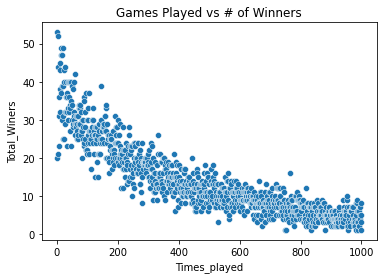

In [114]:
sns.scatterplot(x=plays_to_wins["Times_played"], y = plays_to_wins["Total_Winers"]).set(title='Games Played vs # of Winners')

Interestingly enough, with 100 simulation there seems to be an asymptote at 0 winners when approaching a thousand. This does make intutive sense however since there is always a small chance of a player beating the house over a large number of games. However, when one looks at this graph, you might begin to doubt if that small chance will happen to you.

## Other Roulette Bets

Next is to try other stratagies. First thing is first, to recreate our payout systems.

In [115]:
#1 to 1's
#takes list of how much is bet on for both red and black, [4,2] 4 dollar bet on red, 2 dollar bet on black
def color(color_bets, number):
    
    red_numbers = [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]
    black_numbers = [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]
    
    payout = 0
    total_bets = color_bets[0] + color_bets[1]
    
    if number in red_numbers:
        payout += color_bets[0]*2
    elif number in black_numbers:
        payout += color_bets[1]*2

    return payout - total_bets

#takes list of bets on even and odds similiar to red and black [1,2] 1 dollar even, 2 dollar odds
def even_odds(even_odds_bets, number):
    payout = 0
    total_bets = even_odds_bets[0] + even_odds_bets[1]
    
    if number == 0 or number == 37:
        payout = 0
    elif number%2 == 0:
        payout = even_odds_bets[0]*2
    elif number%2 == 1:
        payout = even_odds_bets[1]*2

    return payout - total_bets

#takes list of bets on high or low, [high,low]
def high_low(high_low_bets, number):
    payout = 0
    total_bets = high_low_bets[0] + high_low_bets[1]
    
    if number == 0 or number == 37:
        payout = 0
    elif number > 18:
        payout = high_low_bets[0]*2
    else:
        payout = high_low_bets[1]*2

    return payout - total_bets


In [116]:
# 2 to 1's

#1st 2nd 3rd dozen
def dozens(dozen_bets , number):
    
    payout = 0
    total_bets = dozen_bets[0] + dozen_bets[1] + dozen_bets[2]
    
    if number == 0 or number == 37:
        payout = 0
    elif number > 24:
        payout = dozen_bets[0]*3
    elif number > 12:
        payout = dozen_bets[1]*3
    else:
        payout = dozen_bets[2]*3
        
    return payout - total_bets
    

#columns
def columns(column_bets , number):
    
    payout = 0
    total_bets = column_bets[0] + column_bets[1] + column_bets[2]
    
    if number == 0 or number == 37:
        payout = 0
    elif (number +3)%3 == 1:
        payout = column_bets[0]*3
    elif (number +3)%3 == 2:
        payout = column_bets[1]*3
    else:
        payout = column_bets[2]*3
        
    return payout - total_bets



In [117]:
#takes list of 6
def line(line_bets , number):
    payout = 0
    total_bets = sum(line_bets)
    
    if number == 0 or number == 37:
        payout = 0
    
    else:
        line = (number - 1)//6
        payout += line_bets[line]*6
        
    return payout - total_bets

#takes list of 11
def street(street_bets, number):
    payout = 0
    total_bets = sum(street_bets)
    
    if number == 0 or number == 37:
        payout = 0
    
    else:
        street = (number - 1)//3
        payout += street_bets[street]*12
        
    return payout - total_bets


In [118]:
#Corner bet takes list 37*[0] representing the 37 possible bets - 0 for betting zero. The possible bets works as follows
#Cornor 1,2,4,5 is represented by index 1, 2,3,5,6 is represented by 2. The upper left number represents the index in the list.
#A cornor bet on 3,4,6,7 is not possible, therefore these index's will always be zero and a an if statment filters them out
def cornor(cornor_bets, number):
    
    payout = 0
    total_bets = sum(cornor_bets)
    
    bet_number = 0
    for x in cornor_bets:
        
        if (bet_number+3)%3 != 0 and x != 37:
            
            winners = [bet_number,bet_number+1,bet_number+3,bet_number+4]
            
            if number in winners:
                payout += x*9
                
        bet_number += 1   
    return payout-total_bets
    

In [119]:
#up down split bet, the top number represents the index in each bet so a list of 34 will be taken
def split_updown(bets, number):

    payout = 0
    total_bets = sum(bets)
    
    bet_number = 0
    for x in bets:
        
        if bet_number != 0 and x !=37:
            winners = [bet_number, bet_number+3]
            
            if number in winners:
                payout += x*18
        bet_number += 1
    return payout-total_bets
        
#side split bet, the left number represents the index in each bet so a list of 25 will be taken    
def split_sides(bets, number):

    payout = 0
    total_bets = sum(bets)
    
    bet_number = 0
    for x in bets:
        
        if bet_number != 0 and x !=37:
            winners = [bet_number, bet_number+1]
            
            if number in winners:
                payout += x*18
                
        bet_number += 1
                
    return payout-total_bets
    
    

In [120]:
def straight_up(bets, number):
    payout = 0
    total_bets = sum(bets)
    
    payout = bets[number]*36
    
    return payout-total_bets
        
        

In [121]:
#37 is specified as double 0
def spin():
    return random.randrange(0,38)

In [123]:
"""takes list of bets on each possible roulette bet
Index
0 color []*2 0 = Red, 1 = Black
1 even_odds []*2 0 = odds, 1 = even
2 high_low []*2 = 0 = high 1 = low
3 dozens []*3 0 = 1st dozen etc.
4 columns []*3 0 = 1st column etc.
5 line []*6 0 - 0 = 123456 etc.
6 street []*11 = 0 = 123 etc.
7 cornor_bet[]*37 index = top left cornor number 1 = 1,2,4,5
8 split_updown []*34 index = top number disregard 0 index
9 split_sides []*25 index = first number disregard 0 index
10 straight up []*37 index = number 00 = 37

""" 

def gamble(bets, number_of_spins): 
    payout = 0
    for x in range(number_of_spins):
        winner = spin()
        payout += color(bets[0],winner)
        payout += even_odds(bets[1],winner)
        payout += high_low(bets[2],winner)
        payout += dozens(bets[3],winner)
        payout += columns(bets[4],winner)
        payout += line(bets[5],winner)
        payout += street(bets[6],winner)
        payout += cornor(bets[7],winner)
        payout += split_updown(bets[8],winner)
        payout += split_sides(bets[9],winner)
        payout += straight_up(bets[10],winner)
        
    return payout
    

In [124]:
color_list = [0]*2
evenodds_list = [0]*2
highlow_list = [0]*3
dozens_list = [0]*3
columns_list = [0]*3
line_list = [0]*6
street_list = [0]*12
cornor_list = [0]*37
split_updown_list = [0]*34
split_sides_list = [0]*25
straight_up_list = [0]*38

full_bet_list = [color_list, evenodds_list,highlow_list,dozens_list,columns_list,line_list,street_list,cornor_list,split_updown_list,split_sides_list,straight_up_list]

color_list[0] = 10
evenodds_list[0] = 10
dozens_list[1] = 10
line_list[3] = 10
highlow_list[0] = 10
columns_list[0] = 10
street_list[0] = 10
straight_up_list[34] = 10
straight_up_list[27] = 10
straight_up_list[12] = 10
cornor_list[2] = 10
split_updown_list[2] = 10

### Explanation of Simulation

There are nearly endless stratagies when it comes to Roulette since there is so much to bet on, and even the more famous ones are too varied to go over in this project. However, we can simulate many different stratagies by generating random bets across all the bet types. The simple way to do this is for each possible bet generate a random number between 1 and 0 and if it is greater than 0.5 divided by total number of that bet type, then to put a bet on it. This will not show what any indvidual stratagy might do, but will give an overall idea of gambling in roulette.

In [125]:
def generate_random_strategy():
    color_list = [0]*2
    evenodds_list = [0]*2
    highlow_list = [0]*3
    dozens_list = [0]*3
    columns_list = [0]*3
    line_list = [0]*6
    street_list = [0]*12
    cornor_list = [0]*37
    split_updown_list = [0]*34
    split_sides_list = [0]*25
    straight_up_list = [0]*38

    full_bet_list = [color_list, evenodds_list,highlow_list,dozens_list,columns_list,line_list,street_list,cornor_list,split_updown_list,split_sides_list,straight_up_list]
    
    for bet_type in full_bet_list:
        
        bet_number = 0
        for bet in bet_type:
            random_number = random.random()
            if random_number < 0.5/len(bet_type):
                bet_type[bet_number] = 10
                
            bet_number += 1
                
    return full_bet_list
                
        
    

In [259]:
def simulate_Roulette_Advanced(number_of_plays, number_of_simulations):
    outcomes = []
    for x in range(number_of_simulations):
        outcomes.append(gamble(generate_random_strategy(), number_of_plays))
        
    return pd.DataFrame(outcomes, columns = ["Gain/Loss"])

In [161]:
simulation_2 = simulate_Roulette_Advanced(1,5000)

In [162]:
simulation_2

,0
0,-40
1,490
2,-60
3,40
4,-40
...,...
4995,-20
4996,-20
4997,-60
4998,-10


In [387]:
alt.Chart(simulation_2).mark_bar().encode(
    alt.X("0:Q",bin=Bin(step = 10, anchor=0), title = 'Total Gains/Losses', scale = alt.Scale(domain=(-500, 500))),
    alt.Y('count()', title = 'Total Players'),
).properties(title='Net Gains or Losses of 5000 Roulette players betting 10 dollars each on 1 game')

alt.Chart(...)

A key interest now is the tail in this graph. With a binary variable or simple EV calculation, you might assume a normal distribution. Roulette does not have a normal distribution a 1 spin though. This is due to the large payout when hitting certian bets, and morst likley the reason for the small hump right before 37. The payout for straight up is 36 to 1. So one hit on there added to a small expected loss gets you in the range of 290 to 350. This tail causes some very interesting curiosities down the line. Now let's compare 1 spin to 10 and 100.

In [561]:
simulations_compare = []
for i in range(0,3):
    simulations_compare.append(simulate_Roulette_Advanced(10**i,5000))

In [562]:
outcomes = []
for simulation in simulations_compare:
    
    simulation['Winners']= simulation['Gain/Loss'][simulation['Gain/Loss'] > 0]
    simulation["Even"] = simulation['Gain/Loss'][simulation['Gain/Loss'] == 0]
    simulation['Losers']= simulation['Gain/Loss'][simulation['Gain/Loss'] < 0]
    
    outcomes.append(pd.DataFrame({"total_players":[simulation.shape[0] - simulation['Winners'].isna().sum(),simulation.shape[0] - simulation['Even'].isna().sum(),simulation.shape[0] - simulation["Losers"].isna().sum()]}, index = ["winners", "even", "losers"]))

    

C:\Users\hunte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hunte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hunte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, '100 Spin'), (0.0, 0.3)]

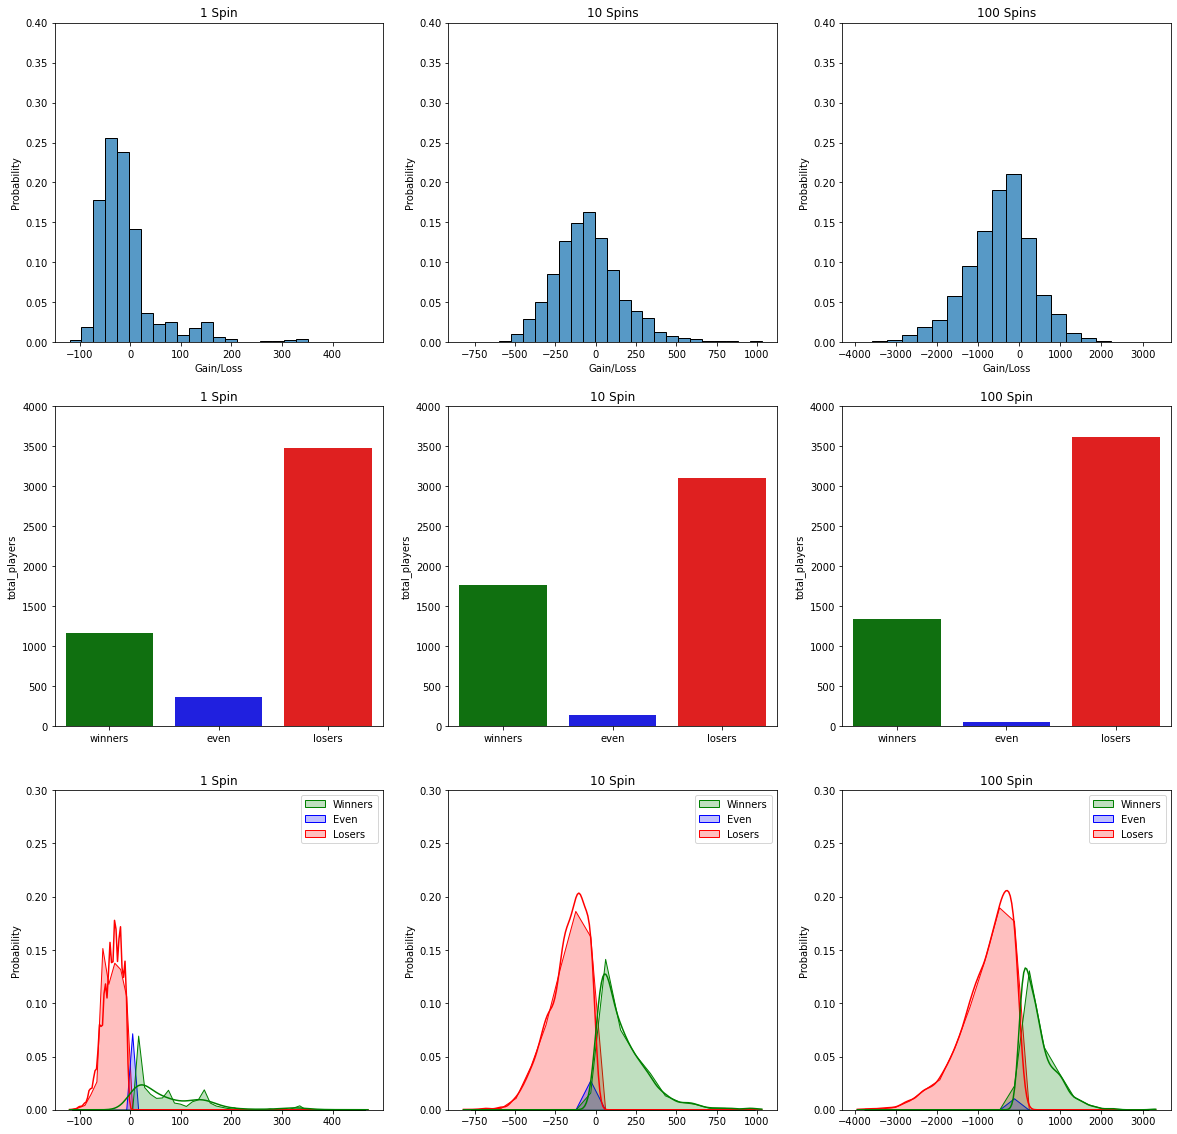

In [563]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.histplot(simulations_compare[0]['Gain/Loss'], stat = "probability", bins = 25).set(title = '1 Spin', ylim = (0,.4))

plt.subplot(3,3,2)
sns.histplot(simulations_compare[1]['Gain/Loss'], stat = "probability", bins = 25).set(title = '10 Spins', ylim = (0,.4))

plt.subplot(3,3,3)
sns.histplot(simulations_compare[2]['Gain/Loss'],  stat = "probability", bins = 20).set(title = '100 Spins', ylim = (0,.4))

plt.subplot(3,3,4)
sns.barplot(outcomes[0].index, outcomes[0]['total_players'], palette = ['Green', 'Blue', 'Red']).set(title = '1 Spin', ylim = (0,4000))

plt.subplot(3,3,5)
sns.barplot(outcomes[1].index, outcomes[1]['total_players'], palette = ['Green', 'Blue', 'Red']).set(title = '10 Spin', ylim = (0,4000))

plt.subplot(3,3,6)
sns.barplot(outcomes[2].index, outcomes[2]['total_players'], palette = ['Green', 'Blue', 'Red']).set(title = '100 Spin', ylim = (0,4000))

plt.subplot(3,3,7)
sns.histplot(simulations_compare[0].drop(columns = ["Gain/Loss"]),element = 'poly', multiple = "layer", kde = True, palette = ['Green', 'Blue', 'Red'], bins = 50, stat = 'probability').set(title = '1 Spin', ylim = (0,.3))

plt.subplot(3,3,8)
sns.histplot(simulations_compare[1].drop(columns = ["Gain/Loss"]),element = 'poly', multiple = "layer", kde = True, palette = ['Green', 'Blue', 'Red'], bins = 20, stat = 'probability').set(title = '10 Spin', ylim = (0,.3))

plt.subplot(3,3,9)
sns.histplot(simulations_compare[2].drop(columns = ["Gain/Loss"]),element = 'poly', multiple = "layer", kde = True, palette = ['Green', 'Blue', 'Red'], stat = 'probability', bins = 20).set(title = '100 Spin', ylim = (0,.3))



Here we get to heart of Roulette's strange behavior that summary statistics would miss. The tail caused by the large gains of some players causes the number of winners to increase between the range of 1 and 10. How is it possible for the winners to increase as sample size goes up? The reason is intutive thinking about the straight up bet. The odds of having a positive bankroll after a single straight up bet is very low, but it increases all the way up to 34 spins. This is due the fact that one hit will pay for all the previous bets. Therefore, at small sample sizes, the more you bet, the better the chances of having a positive bankroll are. 

This of course does not mean it is better to bet 10 times on straight up than it is 1 time. As the middle histogram shows, the winners are being subsidized by losers losing a lot more money, and this trend continues as the histogram scews futher and further left. This leave Roulette as a game that can trap you into thinking you are winning your money back when you are actually slowley losing it.

Let's look at the gains and losses for indvidual players over the course of 1000's of games now.

In [289]:
all_simulations = 0

for x in range(1,101):
    if x == 1:
        all_simulations = simulate_Roulette_Advanced(10,5)
        all_simulations["Number of Games"] = 10
    else:
        new_simulation = simulate_Roulette_Advanced(x*10,5)
        new_simulation["Number of Games"] = x*10
        all_simulations = all_simulations.append(new_simulation)

[Text(0.5, 1.0, 'Gain/Loss vs Total Games Played')]

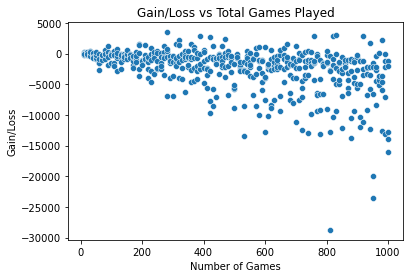

In [290]:
sns.scatterplot(x=all_simulations["Number of Games"], y = all_simulations["Gain/Loss"]).set(title='Gain/Loss vs Total Games Played')

As opposed to a binary bet we see a very different trend. The Casino seems to be breaking even on the majority of players while making a huge some off a few unlucky few. These are most likley indivdiuals that never hit any large bets to cancel out their continuous losses. At last, let look at the total winners after each number of games played.

In [299]:
simulation = None
total_wins = None
plays_to_wins = None
for x in range(1,1001):
    if x == 1:
        simulation = simulate_Roulette_Advanced(x,100)
        total_wins = (simulation["Gain/Loss"] > 0).value_counts()[1]
        plays_to_wins = pd.DataFrame(data= {"Times_played":[x], "Total_Winers":[total_wins]})
    else:
        new_simulation = simulate_Roulette_Advanced(x,100)
        total_wins = (new_simulation["Gain/Loss"] > 0).value_counts()[1]
        new_plays_to_wins = pd.DataFrame(data={"Times_played":[x], "Total_Winers":[total_wins]})
        plays_to_wins = plays_to_wins.append(new_plays_to_wins)

[Text(0.5, 1.0, 'Games Played vs # of Winners')]

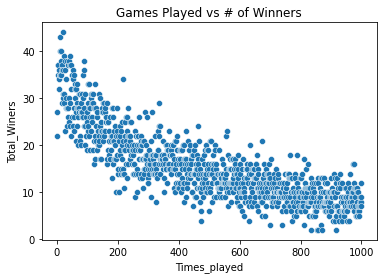

In [300]:
sns.scatterplot(x=plays_to_wins["Times_played"], y = plays_to_wins["Total_Winers"]).set(title='Games Played vs # of Winners')

# Baccarat

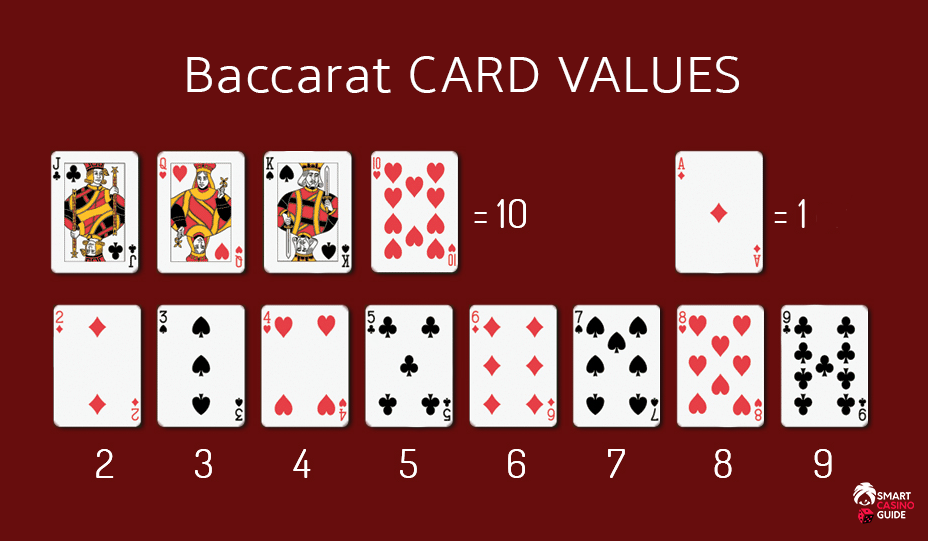

In [568]:
Image(filename = 'What-is-baccarat-guide-how-to-play-baccarat-online-for-real-money-card-rules.png')

Brilijant. “How to Play Baccarat? ▷ System, Rules and Tips【top_2022】.” SmartCasinoGuide.com, 30 May 2022, https://smartcasinoguide.com/how-to-play-baccarat-system-rules-and-tips/. 

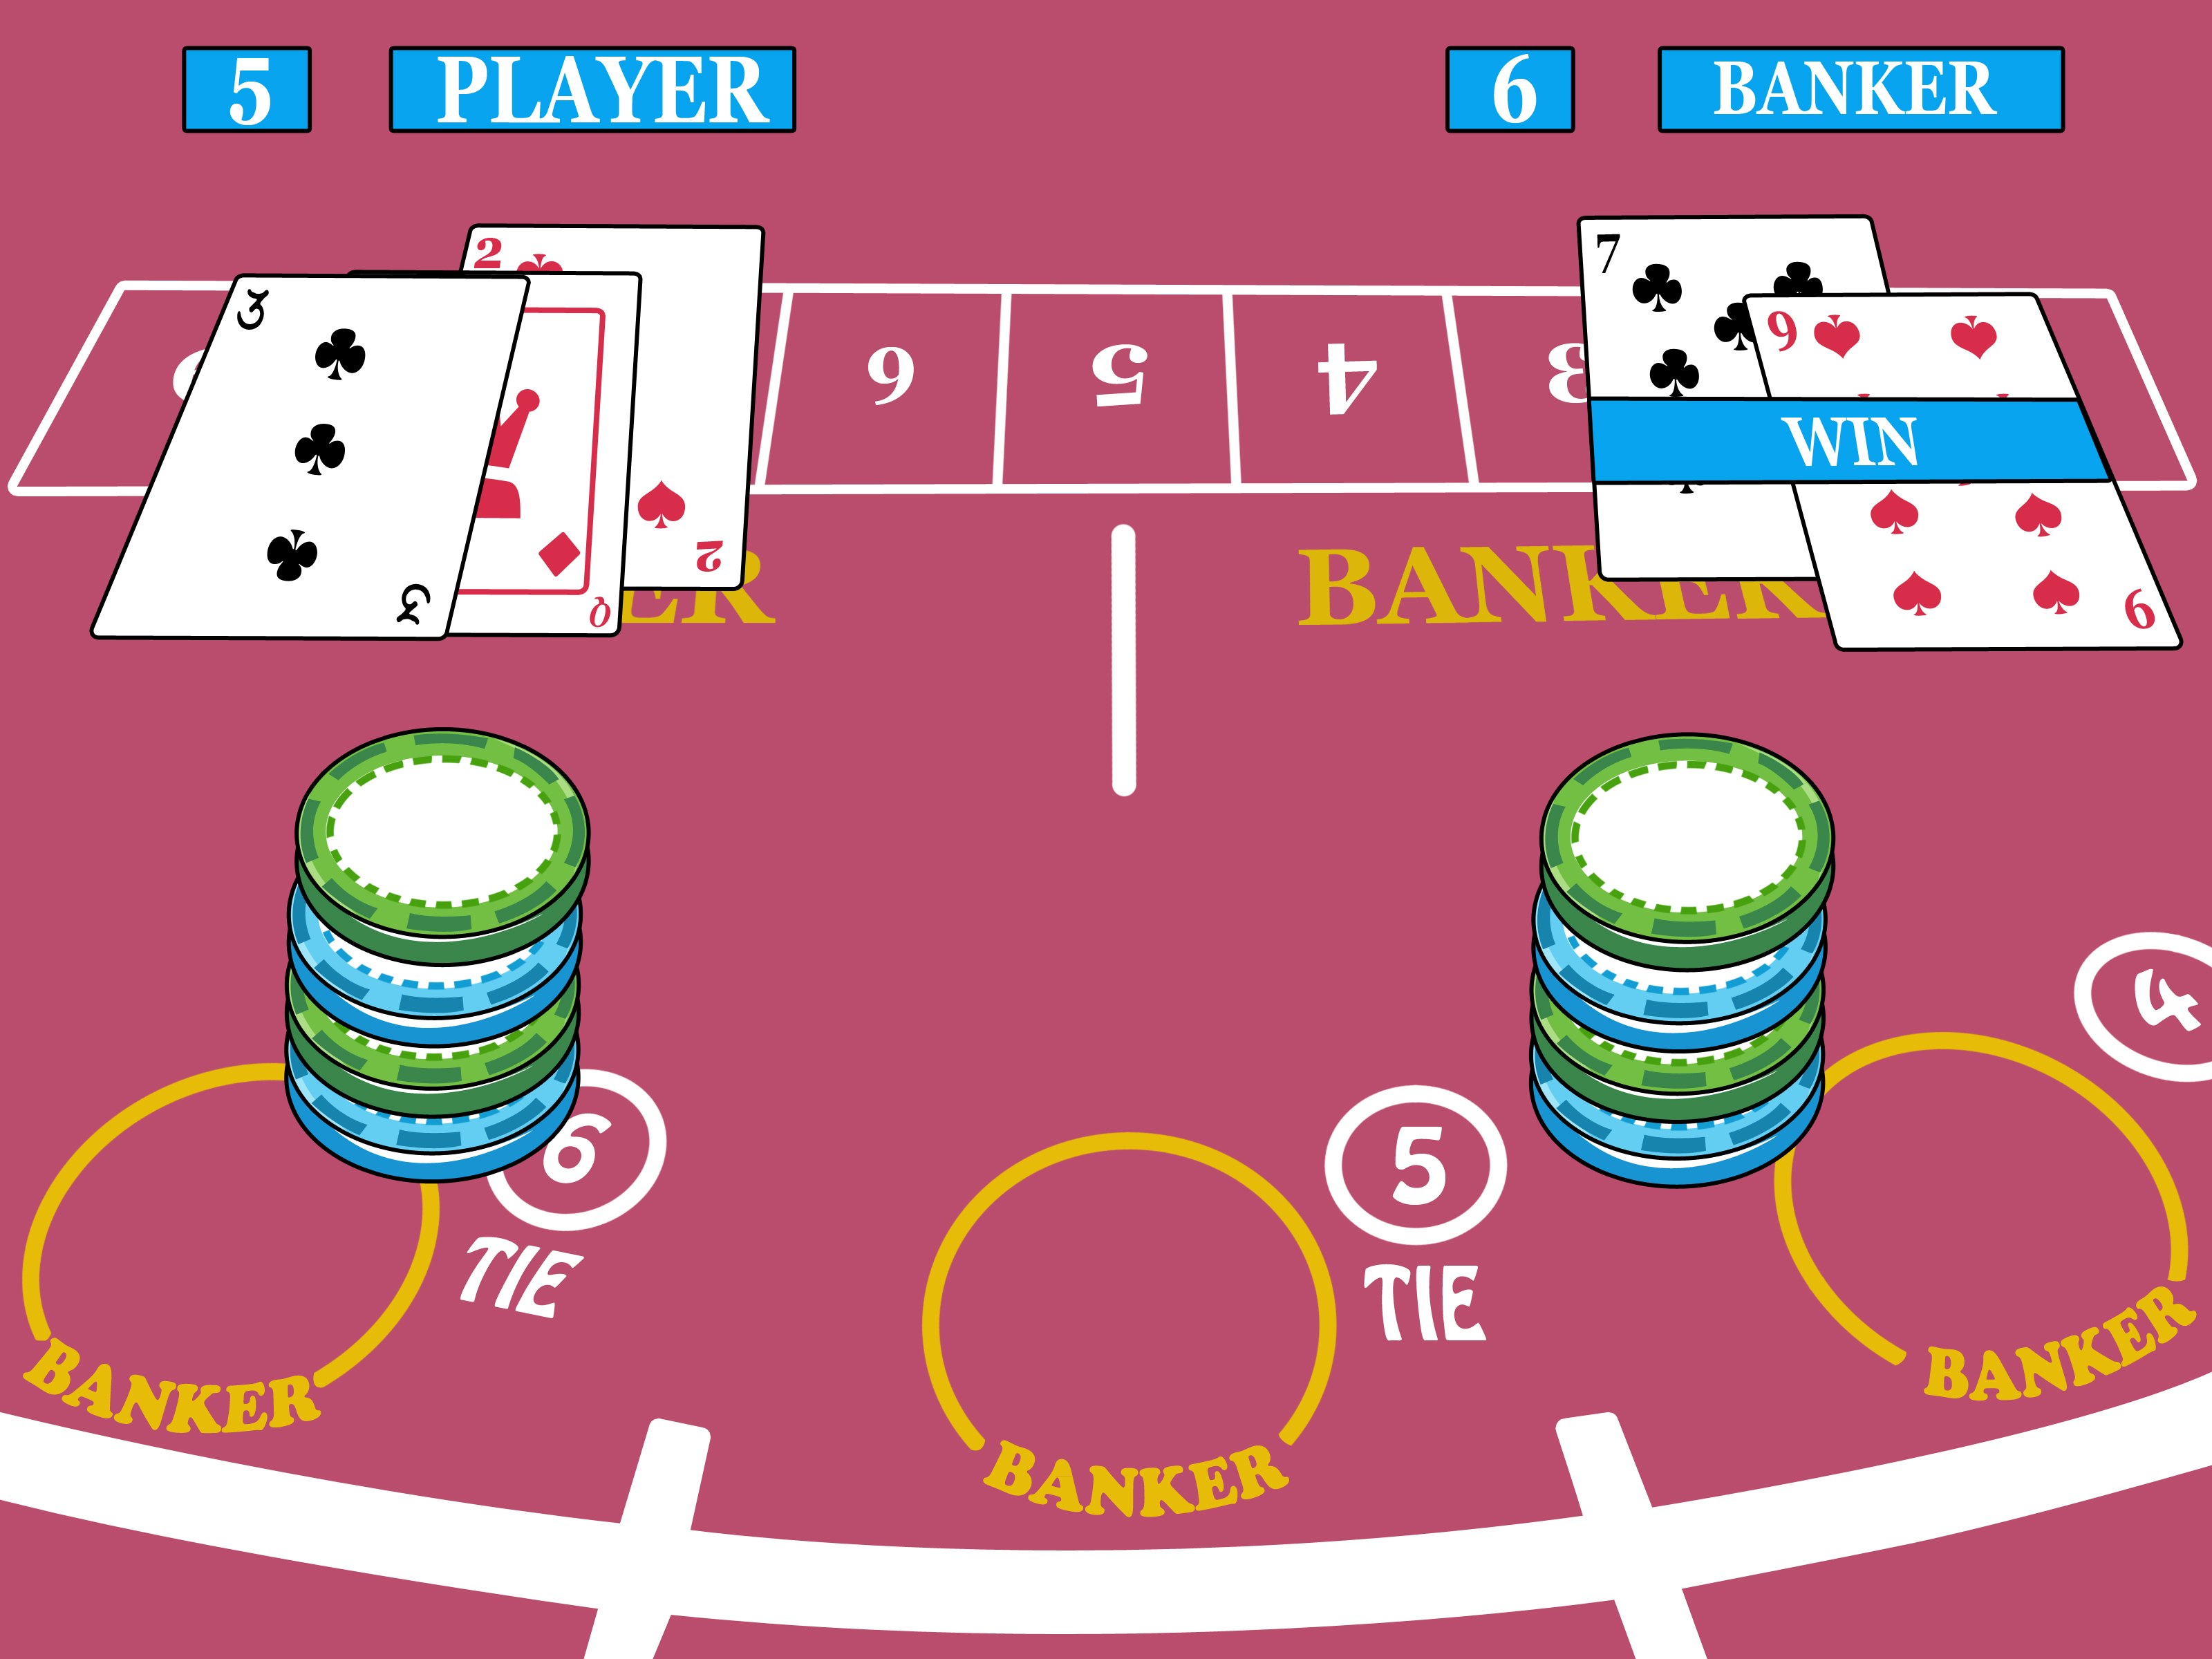

In [571]:
Image(filename = 'Play-Baccarat-Step-7.jpg')

“How to Play Baccarat: 7 Steps (with Pictures).” WikiHow, WikiHow, https://www.wikihow.com/Play-Baccarat. 

In [377]:
def play_baccarat(bets):
    
    cards = [1,2,3,4,5,6,7,8,9,0,0,0,0]    

    player_hand = [random.choice(cards),random.choice(cards)]
    banker_hand = [random.choice(cards),random.choice(cards)]

    player_total = sum(player_hand)
    banker_total = sum(banker_hand)

    if player_total > 9:

        player_total -= 10
            
    if banker_total > 9:

        banker_total -= 10
            
    if player_total != 8 and player_total != 9 and banker_total != 8 and banker_total != 9:

        if player_total < 6:
            
            players_next_card = random.choice(cards)
            
            player_total += players_next_card
            
            if player_total > 9:

                player_total -= 10
            
            if banker_total < 3:
                
                banker_total += random.choice(cards)
                
            elif banker_total == 3 and players_next_card != 8:
                
                banker_total += random.choice(cards)
                
            elif banker_total == 4 and players_next_card in [2,3,4,5,6,7]:
                
                banker_total += random.choice(cards)
                
            elif banker_total == 5 and players_next_card in [4,5,6,7]:
                
                banker_total += random.choice(cards)
                
            elif banker_total == 6 and players_next_card in [6,7]:
            
                banker_total += random.choice(cards)
            
            if banker_total > 9:

                banker_total -= 10 

        else:

            if banker_total < 6:

                banker_total += random.choice(cards)

            if banker_total > 9:

                banker_total -= 10
    
    total_bets = sum(bets)
    payout = 0
    
    if player_total > banker_total:
        
        payout += bets[0]*2
    
    elif player_total < banker_total:
        
        payout += bets[1]*1.95
        
    elif player_total == banker_total:
        
        payout += bets[2]*8
        payout += bets[0]
        payout += bets[1]
        
        
    return payout - total_bets


In [378]:
def gamble_baccarat(bets, number_of_plays):
    result = 0
    
    for x in range(number_of_plays):
        result += play_baccarat(bets)
    
    return result
        

In [379]:
def simulate_baccarat(bets,number_of_plays,number_of_simulations):
    outcomes = []
    for x in range(number_of_simulations):
        outcomes.append(gamble_baccarat(bets,number_of_plays))
        
    return pd.DataFrame(outcomes, columns = ["Gain/Loss"])

In [419]:
x = simulate_baccarat([0,10,0],10,5000)

In [421]:
x.mean()

Gain/Loss   -0.8841
dtype: float64

In [384]:
baccarat = simulate_baccarat([0,10,0],10,5000)

In [385]:
alt.Chart(baccarat).mark_bar().encode(
    alt.X("Gain/Loss:Q",bin=Bin(step=20, anchor=-10), title = 'Total Gains/Losses', scale = alt.Scale(domain=(-110, 110))),
    alt.Y('count()', title = 'Total Players'),
).properties(title='Net Gains or Losses of 5000 Baccarat players betting 10 dollars each on 10 games')

alt.Chart(...)

In [572]:
simulations_player = []
for i in range(1,4):
    simulations_player.append(simulate_baccarat([10,0,10],(10**i),5000))

In [573]:
outcomes_baccarat = []
for simulation in simulations_player:
    
    simulation['Winners']= simulation['Gain/Loss'][simulation['Gain/Loss'] > 0]
    simulation["Even"] = simulation['Gain/Loss'][simulation['Gain/Loss'] == 0]
    simulation['Losers']= simulation['Gain/Loss'][simulation['Gain/Loss'] < 0]
    
    outcomes_baccarat.append(pd.DataFrame({"total_players":[simulation.shape[0] - simulation['Winners'].isna().sum(),simulation.shape[0] - simulation['Even'].isna().sum(),simulation.shape[0] - simulation["Losers"].isna().sum()]}, index = ["winners", "even", "losers"]))

In [574]:
outcomes_baccarat[0]

,total_players
winners,1671
even,28
losers,3301


C:\Users\hunte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hunte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hunte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hunte\anacond

[Text(0.5, 1.0, 'Player Bet 1000 Games'), (0.0, 0.3)]

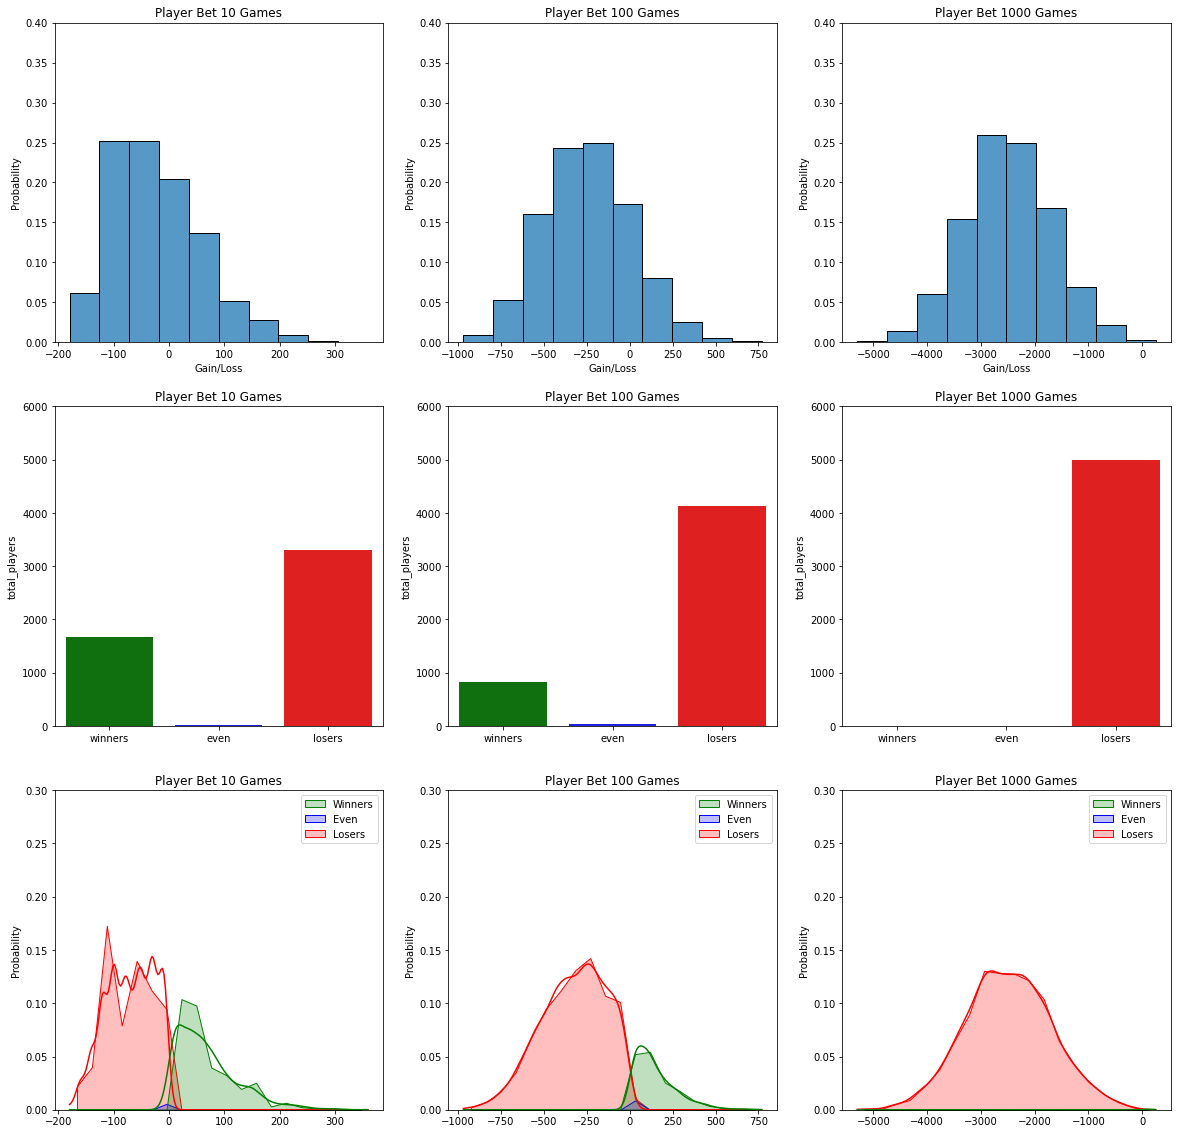

In [577]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.histplot(simulations_player[0]['Gain/Loss'], stat = "probability", bins = 10).set(title = 'Player Bet 10 Games', ylim = (0,.4))

plt.subplot(3,3,2)
sns.histplot(simulations_player[1]['Gain/Loss'], stat = "probability", bins = 10).set(title = 'Player Bet 100 Games', ylim = (0,.4))

plt.subplot(3,3,3)
sns.histplot(simulations_player[2]['Gain/Loss'],  stat = "probability", bins = 10).set(title = 'Player Bet 1000 Games', ylim = (0,.4))

plt.subplot(3,3,4)
sns.barplot(outcomes[0].index, outcomes_baccarat[0]['total_players'], palette = ['Green', 'Blue', 'Red']).set(title = 'Player Bet 10 Games', ylim = (0,6000))

plt.subplot(3,3,5)
sns.barplot(outcomes[1].index, outcomes_baccarat[1]['total_players'], palette = ['Green', 'Blue', 'Red']).set(title = 'Player Bet 100 Games', ylim = (0,6000))

plt.subplot(3,3,6)
sns.barplot(outcomes[2].index, outcomes_baccarat[2]['total_players'], palette = ['Green', 'Blue', 'Red']).set(title = 'Player Bet 1000 Games', ylim = (0,6000))

plt.subplot(3,3,7)
sns.histplot(simulations_player[0].drop(columns = ["Gain/Loss"]),element = 'poly', multiple = "layer", kde = True, palette = ['Green', 'Blue', 'Red'], bins = 20, stat = 'probability').set(title = 'Player Bet 10 Games', ylim = (0,.3))

plt.subplot(3,3,8)
sns.histplot(simulations_player[1].drop(columns = ["Gain/Loss"]),element = 'poly', multiple = "layer", kde = True, palette = ['Green', 'Blue', 'Red'], bins = 20, stat = 'probability').set(title = 'Player Bet 100 Games', ylim = (0,.3))

plt.subplot(3,3,9)
sns.histplot(simulations_player[2].drop(columns = ["Gain/Loss"]),element = 'poly', multiple = "layer", kde = True, palette = ['Green', 'Blue', 'Red'], stat = 'probability', bins = 20).set(title = 'Player Bet 1000 Games', ylim = (0,.3))

In [578]:
simulation_player_100 = simulate_baccarat([10,0,0],(100),5000)
simulation_banker_100 = simulate_baccarat([0,10,0],(100),5000)
simulation_tie_100 = simulate_baccarat([0,0,10],(100),5000)

In [435]:
simulation_baccarat_strats = [simulation_player_100,simulation_banker_100,simulation_tie_100]

In [436]:
outcomes_baccarat_2 = []
for simulation in simulation_baccarat_strats:
    
    simulation['Winners']= simulation['Gain/Loss'][simulation['Gain/Loss'] > 0]
    simulation["Even"] = simulation['Gain/Loss'][simulation['Gain/Loss'] == 0]
    simulation['Losers']= simulation['Gain/Loss'][simulation['Gain/Loss'] < 0]
    
    outcomes_baccarat_2.append(pd.DataFrame({"total_players":[simulation.shape[0] - simulation['Winners'].isna().sum(),simulation.shape[0] - simulation['Even'].isna().sum(),simulation.shape[0] - simulation["Losers"].isna().sum()]}, index = ["winners", "even", "losers"]))

C:\Users\hunte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hunte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hunte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Tie'), (0.0, 5000.0)]

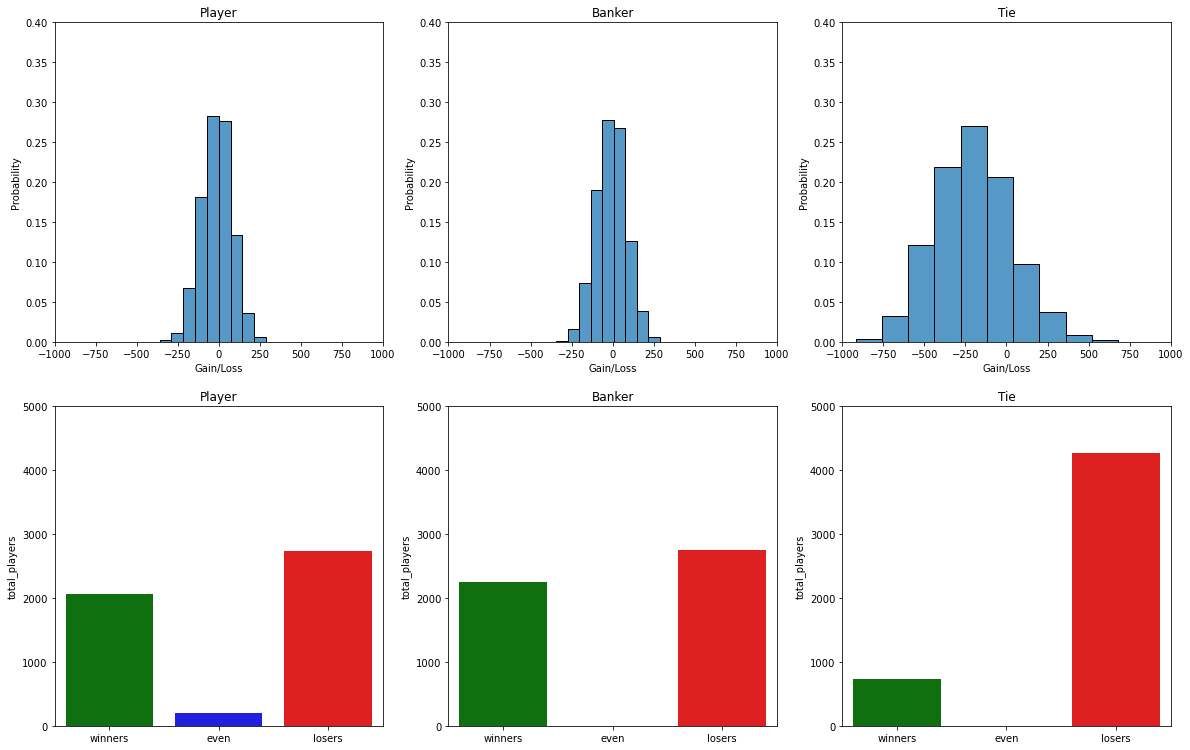

In [595]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.histplot(simulation_baccarat_strats[0]['Gain/Loss'], stat = "probability", bins = 10).set(title = 'Player',xlim = (-1000,1000), ylim = (0,.4))

plt.subplot(3,3,2)
sns.histplot(simulation_baccarat_strats[1]['Gain/Loss'], stat = "probability", bins = 10).set(title = 'Banker',xlim = (-1000,1000), ylim = (0,.4))

plt.subplot(3,3,3)
sns.histplot(simulation_baccarat_strats[2]['Gain/Loss'],  stat = "probability", bins = 10).set(title = 'Tie', xlim = (-1000,1000), ylim = (0,.4))

plt.subplot(3,3,4)
sns.barplot(outcomes[0].index, outcomes_baccarat_2[0]['total_players'], palette = ['Green', 'Blue', 'Red']).set(title = 'Player', ylim = (0,5000))

plt.subplot(3,3,5)
sns.barplot(outcomes[1].index, outcomes_baccarat_2[1]['total_players'], palette = ['Green', 'Blue', 'Red']).set(title = 'Banker', ylim = (0,5000))

plt.subplot(3,3,6)
sns.barplot(outcomes[2].index, outcomes_baccarat_2[2]['total_players'], palette = ['Green', 'Blue', 'Red']).set(title = 'Tie', ylim = (0,5000))

In [433]:
simulation_banker_100.min()

Gain/Loss   -344.0
Winners        5.0
Even           NaN
Losers      -344.0
dtype: float64

# BlackJack

BlackJack is probably the most famous of Casino games. It contains a lot of complex strategy and gives players a greater freedom to affect the odds, so much so, that entire books have been written concerning gambling at BlackJack. For the purpouses of this project we will not be concenred with all the different possible stratagies and their odds, but rather odds calculate via the UNLV gambling research center for average player and for a player using basic strategy in 6 deck game. We also vizualize the approximate 1.5% advantage over the House given by card counting. https://www.inc.com/magazine/20080801/luck-is-for-losers.html

In [440]:
#one instance of blackjack being played, houseAdvantage is a decimal probability, 
#for this study we will consider 0.02, .005, and - 0.015
def play_blackjack(bet, houseAdvantage):
    
    player_odds = (1 - houseAdvantage)/2
    random_number = random.random()
    
    if random_number <= player_odds:
        
        return bet*2 - bet
    
    else:
        
        return -1*(bet)

    

In [441]:
#simulate one gambler with many plays
def gamble_blackjack(bet,houseAdvantage, number_of_plays):
    
    total_payout = 0
    
    for x in range(number_of_plays):
        total_payout += play_blackjack(bet,houseAdvantage)
        
    return total_payout

In [442]:
#simulate_several_gamblers playing blackjack, dataframe gives results for the many different players
def simulate_blackjack(bet,houseAdvanatage,number_of_plays, number_of_sims):
    
    outcomes = []
    for x in range(number_of_sims):
        outcomes.append(gamble_blackjack(bet, houseAdvanatage, number_of_plays))
        
    return pd.DataFrame(outcomes, columns = ['Gain/Loss'])

In [529]:
average_player = simulate_blackjack(10,.02,1000,1000)
solid_player = simulate_blackjack(10,.005,1000,1000)
counting = simulate_blackjack(10,-0.015,1000,1000)

[Text(0.5, 1.0, 'Counting Cards for 1000 Hands'), (0.0, 0.25)]

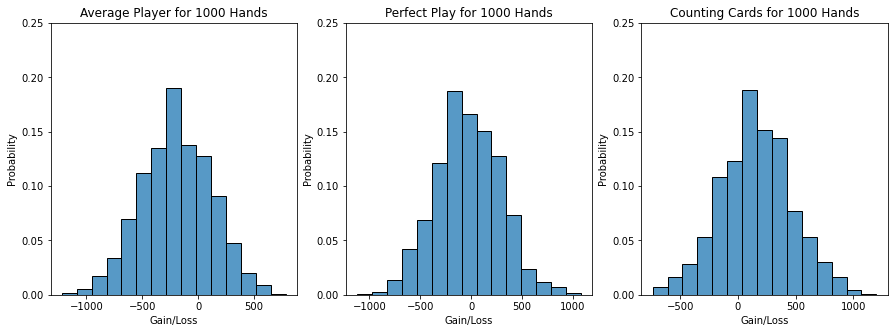

In [566]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(average_player['Gain/Loss'], stat = "probability", bins = 15).set(title = 'Average Player for 1000 Hands', ylim = (0,.25))

plt.subplot(1,3,2)
sns.histplot(solid_player['Gain/Loss'], stat = "probability", bins = 15).set(title = 'Perfect Play for 1000 Hands', ylim = (0,.25))

plt.subplot(1,3,3)
sns.histplot(counting['Gain/Loss'],  stat = "probability", bins = 15).set(title = 'Counting Cards for 1000 Hands', ylim = (0,.25))

[Text(0, 0.5, 'Total Profits')]

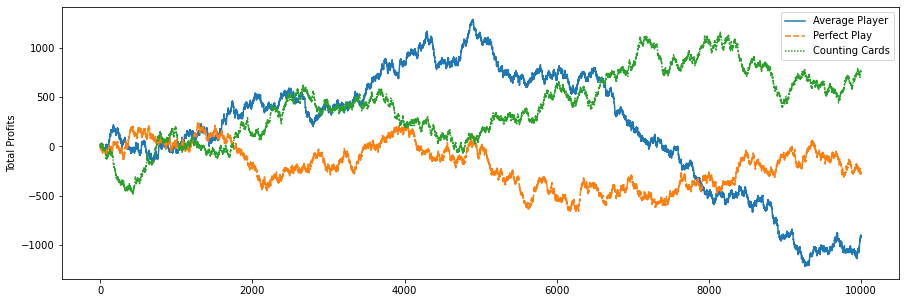

In [591]:
plt.figure(figsize=(15,5))
total_bankroll = 0
bank_roll_line = []
for x in range(10000):
    total_bankroll += play_blackjack(10,0.02)
    bank_roll_line.append(total_bankroll)

player_strats = pd.DataFrame(bank_roll_line, columns =["Average Player"])

total_bankroll = 0
bank_roll_line = []
for x in range(10000):
    total_bankroll += play_blackjack(10,0.005)
    bank_roll_line.append(total_bankroll)

player_strats['Perfect Play'] = bank_roll_line

total_bankroll = 0
bank_roll_line = []
for x in range(10000):
    total_bankroll += play_blackjack(10,-0.0015)
    bank_roll_line.append(total_bankroll)

player_strats['Counting Cards'] = bank_roll_line
    
sns.lineplot(data=player_strats).set(ylabel = 'Total Profits')